### Blocked time series split implementation

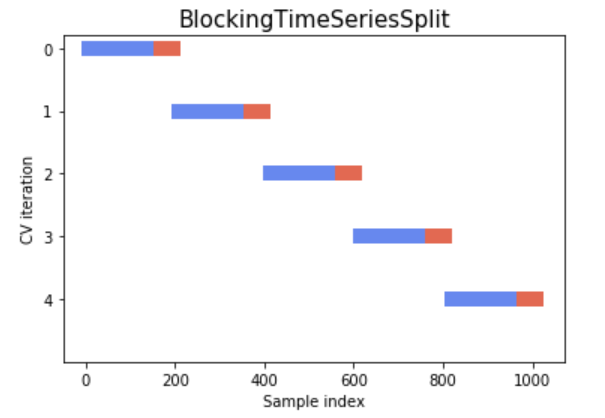

In [18]:
import pandas as pd

df = pd.read_csv('data.csv')
df['published_at'] = df['published_at'].apply(lambda x: x[:10])
df.rename(columns={'published_at': 'date'}, inplace=True)
df.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,date,content,category,full_content
0,89541,NaN,International Business Times,Paavan MATHEMA,UN Chief Urges World To 'Stop The Madness' Of ...,UN Secretary-General Antonio Guterres urged th...,https://www.ibtimes.com/un-chief-urges-world-s...,https://d.ibtimes.com/en/full/4496078/nepals-g...,2023-10-30,UN Secretary-General Antonio Guterres urged th...,Nepal,UN Secretary-General Antonio Guterres urged th...
1,89542,NaN,Prtimes.jp,NaN,RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。,[株式会社Ainer]\nRANDEBOO（ランデブー）では2023年7月18日(火)より公...,https://prtimes.jp/main/html/rd/p/000000147.00...,https://prtimes.jp/i/32220/147/ogp/d32220-147-...,2023-10-06,"RANDEBOO2023718()WEB2023 Autumn Winter \n""Nepa...",Nepal,NaN
2,89543,NaN,VOA News,webdesk@voanews.com (Agence France-Presse),UN Chief Urges World to 'Stop the Madness' of ...,UN Secretary-General Antonio Guterres urged th...,https://www.voanews.com/a/un-chief-urges-world...,https://gdb.voanews.com/01000000-0a00-0242-60f...,2023-10-30,"Kathmandu, Nepal UN Secretary-General Antonio...",Nepal,NaN
3,89545,NaN,The Indian Express,Editorial,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,https://indianexpress.com/article/opinion/edit...,https://images.indianexpress.com/2023/10/edit-...,2023-10-06,At least 14 persons lost their lives and more ...,Nepal,At least 14 persons lost their lives and more ...
4,89547,NaN,The Times of Israel,Jacob Magid,"200 foreigners, dual nationals cut down in Ham...","France lost 35 citizens, Thailand 33, US 31, U...",https://www.timesofisrael.com/200-foreigners-d...,https://static.timesofisrael.com/www/uploads/2...,2023-10-27,"Scores of foreign citizens were killed, taken ...",Nepal,NaN


In [ ]:
K = 5 # Number of splits

def blocked_split(df, K, col_name):
    # Sort by chronological order
    df = df.sort_values(by=col_name)

    split_size = int(len(df) / K)
    splitted_dfs = []

    # Append the dfs 
    for i in range(1, K):
        splitted_dfs.append(df.iloc[(i-1) * split_size: i * split_size])
    splitted_dfs.append(df.iloc[(K-1) * split_size:])

    return splitted_dfs

In [20]:
dfs = blocked_split(df, K, 'date')

In [36]:
for i in range(K):
    dfs[i].sort_values(by='date', inplace=True)
    print(f'split {i + 1}')
    print(f'first date: {dfs[i].iloc[0]["date"]}')
    print(f'first date: {dfs[i].iloc[-1]["date"]}')

split 1
first date: 2023-10-01
first date: 2023-10-16
split 2
first date: 2023-10-16
first date: 2023-10-31
split 3
first date: 2023-10-31
first date: 2023-11-04
split 4
first date: 2023-11-04
first date: 2023-11-14
split 5
first date: 2023-11-14
first date: 2023-11-29
